In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving haberman.csv to haberman.csv


####1.Basic description of Haberman Data

In [ ]:
print(df)
print(df.shape)
print(df.columns)
##calculate number of counts of status class
df['status'].value_counts()
###Normalization of Status
print(df.iloc[:,-1].value_counts(normalize = True))
df.describe( )

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2

[305 rows x 4 columns]
(305, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
1    0.737705
2    0.262295
Name: status, dtype: float64


,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


#### Observation:
1. Given dataset have 306 rows and 4 columns
2. Columns are [age,year,nodes,status] 
3. we are considering 1 as Yes and 2 as No
4. Data collects 73.52% as Yes and 26.74 as No
5. Age lies between 30-78
6. 75% Patient have 4 nodes
7. Patient year of Opertaion lies between 1958-1969


#### 2. 2-D Scatter Plot

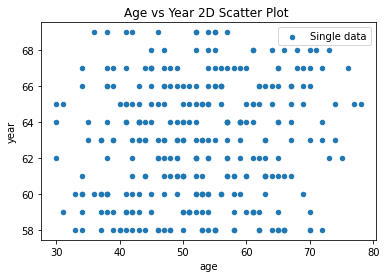

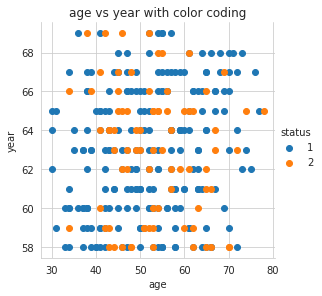

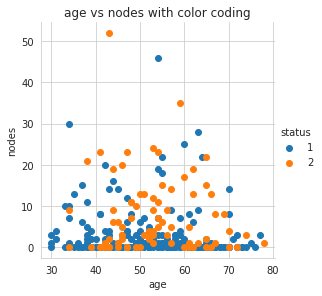

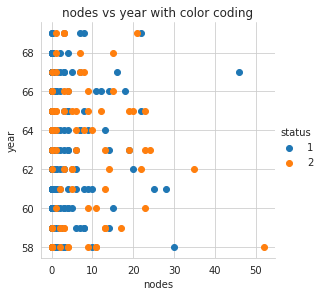

In [ ]:
#2D Scatter plot
df.plot(kind='scatter',x='age',y='year')
plt.legend(['Single data'])
plt.title('Age vs Year 2D Scatter Plot ')
plt.show()
#2D Scatter Plot with color fading
#for color fading sns library will be use
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',height=4).map(plt.scatter,'age','year').add_legend()#.set_titles(df,['title'])
plt.title('age vs year with color coding')
plt.show()
sns.FacetGrid(df,hue='status',height=4).map(plt.scatter,'age','nodes').add_legend()
plt.title('age vs nodes with color coding')
plt.show()
sns.FacetGrid(df,hue='status',height=4).map(plt.scatter,'nodes','year').add_legend()
plt.title('nodes vs year with color coding')
plt.show()

#plt.show()

#### Observation:
 1. Based on the 3 varying parameter our total number of plot will be 3C2 which is 3
 2. from all three 2D scatter plot we are not able to seprate one paremeter which can determine the status of patient


#### 3. 3-D Scatter Plot

In [ ]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_3d(df, x='age', y='year', z='nodes',
              color='status')
fig.update_traces(textposition='top left')
fig.update_layout(
    height=800,
    title_text='3D Scatter Plot'
)

fig.show()


####Observation:
1.blue circle denote 1 and yellow 2 (No)

####4. Pair-Plot

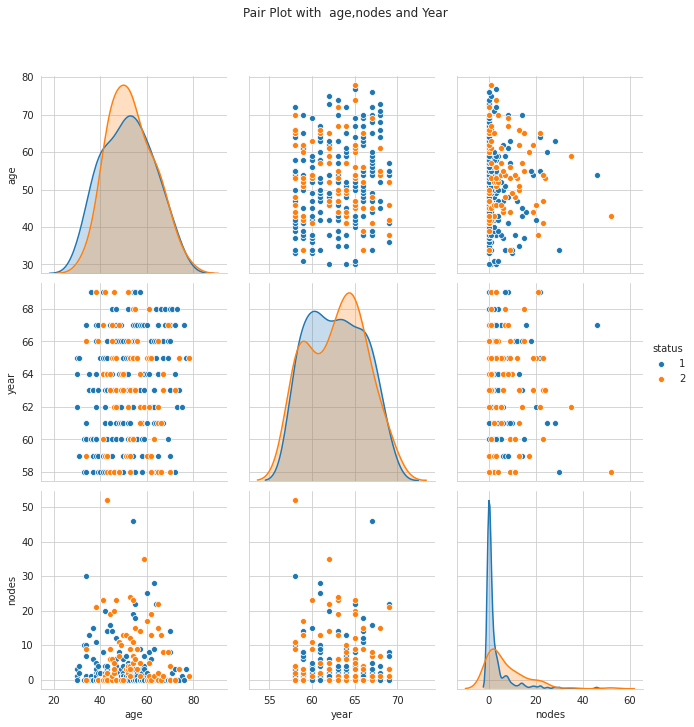

In [ ]:
plt.close();
sns.set_style("whitegrid");
g=sns.pairplot(df, hue="status",height=3);
g.fig.suptitle("Pair Plot with  age,nodes and Year ",y=1.1)
#plt.title('Pair Plot')
plt.show()

Observation:
1. Huge overlapping can be observed among the classes.
2. Thus the classes are linearly separable.

#### 5. 1-D Scatter Plot

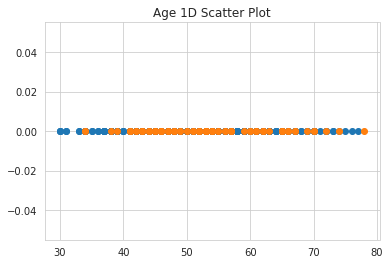

In [ ]:
#1D Scatter Plot
import numpy as np
df_1 = df.loc[df["status"] == 1];
df_2 = df.loc[df["status"] == 2]
plt.plot(df_1["age"], np.zeros_like(df_1['age']), 'o')
plt.plot(df_2["age"], np.zeros_like(df_2['age']), 'o')
plt.title('Age 1D Scatter Plot')
plt.show()


#### Observation 
1. Patient which have age in between 41-58 have less chance of survival

####6.Univarite Analysis

6.1 Patient's Age

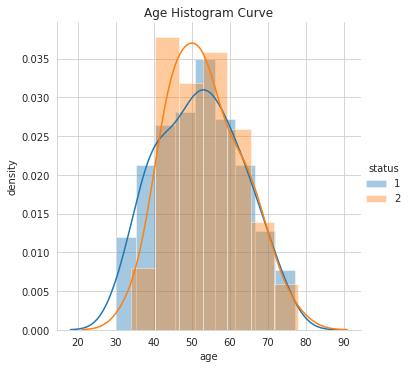

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('density')
plt.xlabel('age')
plt.title('Age Histogram Curve')
plt.show();



#### Observation : More number of Patient survived having age in the range of 30-40

6.2.Year of Operation

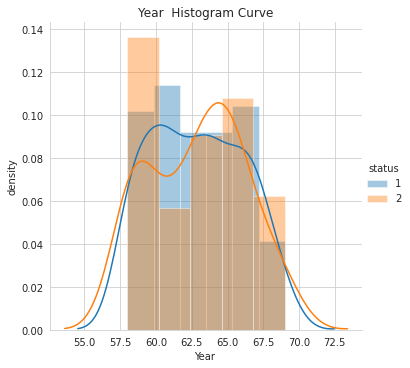

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('density')
plt.xlabel('Year ')
plt.title('Year  Histogram Curve')
plt.show();

####Observation :
1. Major overlaping occur in Year of Operation observation.
2. 1958-1960 there are more failed operation

#### 6.3 Number of Nodes 

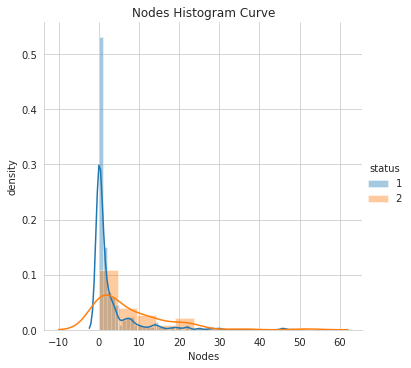

In [ ]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('density')
plt.xlabel('Nodes')
plt.title('Nodes Histogram Curve')
plt.show();

#### Observation :  Patient which have 4 or less nodes have more chance of survival

7.PDF and CDF

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


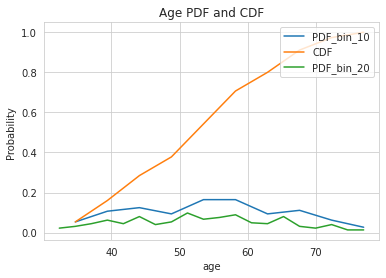

In [ ]:
counts, bin_edges = np.histogram(df_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.ylabel('Probability ')
plt.xlabel('age')
plt.legend(('PDF_bin_10','CDF','PDF_bin_20'),
           loc='upper right')
plt.title('Age PDF and CDF')
plt.show();

[0.25   0.05   0.0375 0.0875 0.1    0.1    0.1625 0.075  0.05   0.0875]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


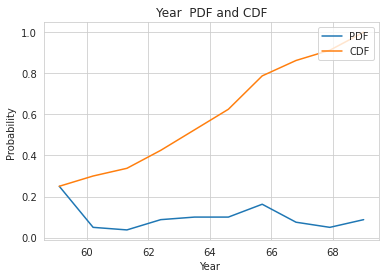

In [ ]:
counts, bin_edges = np.histogram(df_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel('Probability ')
plt.xlabel('Year ')
plt.legend(('PDF','CDF'),
           loc='upper right')
plt.title('Year  PDF and CDF')


plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.0375 0.075  0.2125 0.1125 0.2    0.1    0.0875 0.1125 0.0375 0.025 ]
[34.  38.4 42.8 47.2 51.6 56.  60.4 64.8 69.2 73.6 78. ]


Text(0.5, 1.0, 'AGE Pdf,Cdf With STAUS')

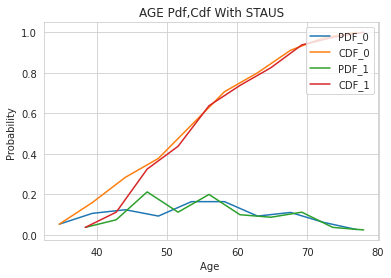

In [ ]:
#Status Yes
counts, bin_edges = np.histogram(df_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Status No
counts, bin_edges = np.histogram(df_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.ylabel('Probability ')
plt.xlabel('Age ')
plt.legend(('PDF_0','CDF_0','PDF_1','CDF_1'),
           loc='upper right')
plt.title('AGE Pdf,Cdf With STAUS')


In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(df_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(df_1["age"],5000)));
print(np.mean(df_2["age"]))
print("\nStd-dev:");
print(np.std(df_1["age"]))
print(np.std(df_2["age"]))



Means:
52.01777777777778
73.91150442477876
53.3125

Std-dev:
10.98765547510051
9.617164018046068


In [ ]:
print("\nMedians:")
print(np.median(df_1["age"]))
#Median with an outlier
print(np.median(np.append(df_1["age"],5000)));
print(np.median(df_2["age"]))


print("\nQuantiles:")
print(np.percentile(df_1["age"],np.arange(0, 100, 25)))
print(np.percentile(df_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df_1["age"],90))
print(np.percentile(df_2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_1["age"]))
print(robust.mad(df_2["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
66.10000000000001

Median Absolute Deviation
13.343419966550417
11.119516638792014


####Box Plot

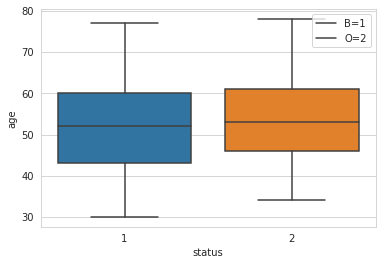

In [ ]:
sns.boxplot(x='status',y='age', data=df)
plt.legend(('B=1','O=2'),
           loc='upper right')
plt.show()

Obseration:
1. Huge overlap and thus unble to differentiate the class based on the plots

####Violin Plot

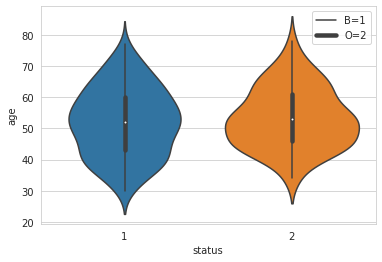

In [ ]:
sns.violinplot(x="status", y="age", data=df, size=8)
plt.legend(('B=1','O=2'),
           loc='upper right')
plt.show()

####Observation :
1. Huge overlap and thus unble to differentiate the class based on the plots
2. Patient's age alone is not an important parameter in determining the survival of a patient

#####Multivariate probability density, contour plot.

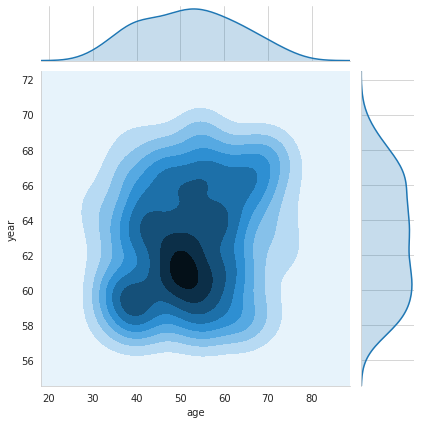

In [ ]:
sns.jointplot(x="age", y="year", data=df_1, kind="kde");
plt.show();



Conclusion:
1. Pateint which have less than 4 nodes have more chance of survial
2. There are more overlap in various parameter configuration So it's not easy to point one parameter which determine survival of patients
3. Patient's age and year  is not only important parameter in determining the survival of a patient.
4. The objective of classifying the survival status of a new patient based on the given features is a difficult task.